# Исследование продаж видеоигр

Из открытых источников нам доступны исторические данные (до 2016 года) о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). 

**Цели исследования:**

1. Выявить закономерности, определяющие успешность компьютерной игры. 
2. Проанализировать насколько качественно людьми были внесены данные. 
3. Подготовить данные, которые позволят сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
4. Подготовить данные, которые помогут спланировать рекламные кампании.
5. Отработать принцип работы с данными, который позволит прогнозироваь продажи не только на следующий за исследуемый период год, но и на более отдалённые промежутки времени.

**Ход исследования**
<br>
1. Изучение общей информации 
<br>
<br>
Откроем файл и изучим общую информации о данных. Путь к файлу: /datasets/games.csv. На этом этапе познакомимся с данными и сделаем первые выводы:
- поймём насколько данных достаточно для проведения анализа, есть ли пропуски;
- проверим все ли названия столбцов приведены к нижнему регистру;
- узнаем есть ли аномалии, которые могут помешать анализу и работе с данными;
- решим соотвествуют ли типы данных содержанию.
<br>
<br>
2. Предобработка данных
<br>
<br>
На этом этапе:
- найдём пропуски данных и проанализруем природу их возникновения; 
- обработаем эти пропуски (заполним средними или медианными занчениями/удалим строки, если это не повредит целостности данных/оставим без изменений те, с которыми делать что-то будет некорректно);
- поменяем типы данных некоторых столбцов, чтобы облегчить дальнейшие вычисления. 
<br>
3. Добавление данных в таблицу
<br>
<br>
Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.
<br>
<br>
4. Исследовательский анализ данных
<br>
<br>
На этом этапе нам поднадобится:
- проверим сколько игр выпускалось в разные годы и насколько нам важны эти данные за все периоды;
- посмотрим, как менялись продажи по платформам (построим распределение по годам, выясним за какой характерный срок появляются новые и исчезают старые платформы);
- определим актальный период и возьмём данные за этот период;
- выясним, какие платформы лидируют по продажам, растут или падают; 
- исходя из наших данных, выберем несколько потенциально прибыльных платформ;
- построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам, опишим получившийся результат;
- проанализиурем, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков;
- построим диаграмму рассеяния;
- посчитаем корреляцию между отзывами и продажами;
- соотнесём выводы с продажами игр на других платформах.
- посмотрим на общее распределение игр по жанрам;
- поймём выделяются ли жанры с высокими и низкими продажами.
<br>
<br>
5. Составление портрета пользователя каждого региона
<br>
<br>
В этом разделе определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияние на рейтинг ESRB на продажи в отдельном регионе.
<br>
<br>
6. Проверка гипотез
<br>
<br>
На этом этапе будем тестировать гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
<br>
<br>
Пороговое значение alpha зададим самостоятельно, а также поясним:
- как была сформулирована нулевая и альтернативная гипотезы;
- какой критерий применили для проверки гипотез и по какой причине.
<br>
<br>
7. Общий вывод
<br>
<br>
В каждом разделе исследования будем делать промежуточные выводы, которые в финале соберём в единый вывод по всему исследованию.
<br>
<br>
**Описание данных**
<br>
<br>
Name — название игры<br>
Platform — платформа<br>
Year_of_Release — год выпуска<br>
Genre — жанр игры<br>
NA_sales — продажи в Северной Америке (миллионы проданных копий)<br>
EU_sales — продажи в Европе (миллионы проданных копий)<br>
JP_sales — продажи в Японии (миллионы проданных копий)<br>
Other_sales — продажи в других странах (миллионы проданных копий)<br>
Critic_Score — оценка критиков (максимум 100)<br>
User_Score — оценка пользователей (максимум 10)<br>
Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.<br>
<br>
Данные за 2016 год могут быть неполными.
<br>

## Изучение общей информации

In [541]:
# импортируем библиотеки, которые понадобятся нам при работе с файлом
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import seaborn as sns
from scipy import stats as st

In [542]:
# открываем файл
games = pd.read_csv('/datasets/games.csv')

In [543]:
# выведем датафрейм для изучения
games

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [544]:
# выведем общие данные по таблице
games.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


In [545]:
# проверим количество дубликатов
games.duplicated().sum() 

0

In [546]:
# проверим столбец platform на возможные дубликаты
games['Platform'].value_counts()

PS2     2161
DS      2151
PS3     1331
Wii     1320
X360    1262
PSP     1209
PS      1197
PC       974
XB       824
GBA      822
GC       556
3DS      520
PSV      430
PS4      392
N64      319
XOne     247
SNES     239
SAT      173
WiiU     147
2600     133
NES       98
GB        98
DC        52
GEN       29
NG        12
WS         6
SCD        6
3DO        3
TG16       2
GG         1
PCFX       1
Name: Platform, dtype: int64

In [547]:
# проверим столбец genre на возможные дубликаты
games['Genre'].value_counts()

Action          3369
Sports          2348
Misc            1750
Role-Playing    1498
Shooter         1323
Adventure       1303
Racing          1249
Platform         888
Simulation       873
Fighting         849
Strategy         683
Puzzle           580
Name: Genre, dtype: int64

In [548]:
# заменим пропущенные значения в столбце rating на undefiend
games['Rating'] = games['Rating'].fillna('no_rating')

In [549]:
# проверим сводную статистику нашей таблицы
games.describe()

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


У нас есть 16715 строк о продажах игр по 11 параметрам. Для анализа этой информации более чем достаточно. Явных аномалий, как, например, отрицательных данных – нет. Также сразу видим, что в данных много пропусков. Названия столбцов нуждаются в переименовании (лучше выбрать односложные названия,  а также привести к нижнему регистру). В нескольких столбцах (Year_of_Release, User_Score, Raiting) нужно будет изменить тип данных. 

In [550]:
# переимунуем столбец с годом
games.rename(columns={'Year_of_Release':'year'}, inplace=True)

In [551]:
# приведем названия всех столбцов к "змеиному" регистру
games.columns = games.columns.str.lower()

In [552]:
# проверим пропуски
games.isna().sum()

name               2
platform           0
year             269
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8578
user_score      6701
rating             0
dtype: int64

In [553]:
# количество пропусков в процентах
pd.DataFrame(round(games.isna().mean()*100,)).style.background_gradient('coolwarm')

,0
name,0.000000
platform,0.000000
year,2.000000
genre,0.000000
na_sales,0.000000
eu_sales,0.000000
jp_sales,0.000000
other_sales,0.000000
critic_score,51.000000
user_score,40.000000


**Вывод по этапу №1**
- данные полные, для анализа достаточные;
- дубликатов нет;
- отрицательных значений в данных не найдено;
- понадобилось переименование столбцов (упрощение наименований, приведение к нижнему регистру);
- необходимо изменить типы данных в (year, user_score, rating);
- пропуски в 6 столбцах (name, genre, critic_score, user_score, rating): 
-- в столбце year всего два и их можно без опасений заполнить нулями; 
-- наибольшее количество пропусков в столбцах critic_score, user_score, rating и эти пропуски так просто отбросить мы не в праве: мы знаем, что данные за 2016 могут быть неполными, а также в таблице данные про игры выпуска до 2000 года, когда оценки критиков, пользователей и рейтинг могли не ставить или они могли быть не зафиксированными;
-- организация (ESRB), которая присуждает рейтинги играм была основана в 1994 году, поэтому не удивительно, что играм, выпущенным до этой даты не был присуждён рейтинг и в столбце rating столько пропусков.

## Предобработка данных

In [554]:
# удалим пропущенные значения в столбцах name и genre
games.dropna(subset=['name'], inplace=True) 
games.dropna(subset=['genre'], inplace=True)
# и приведём столбец year к типу данных int
games['year'] = games['year'].astype('Int64')

In [555]:
# посмотрим на уникальные значения critic_score
games['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 35., 41., 36., 28., 31., 27., 26., 19., 23.,
       24., 21., 17., 22., 13.])

да, столбец critic_score имеет в значениях только целые числа, но приводить его в целочисленный тип не будем, так как в будущем для высчитывания коэффициента корреляции, например, нам понадоибтся, чтобы он остался float


In [556]:
# посмотрим на уникальные значения столбца user_score
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

В столбце user_score встречается значение tbd, которое означает to be determined (будет определено) или to be decided (будет решено). То есть иными словами это сознательный пропуск данных. Можем заменить это значение на nan

In [557]:
# в столбце user_score обнрауженные значения tbd, которое означает to be determined , заменим их на nan
games['user_score'] = games['user_score'].replace('tbd', np.NaN)
games['user_score'] = games['user_score'].astype('float')


In [558]:
# посмотрим на уникальные значения столбца rating
games['rating'].unique()

array(['E', 'no_rating', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'],
      dtype=object)

In [559]:
# посмотрим на уникальные значения столбца platform
games['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

In [560]:
# проверим пропуски теперь
games.isna().sum()

name               0
platform           0
year             269
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score    8576
user_score      9123
rating             0
dtype: int64

In [561]:
# проверим пропуски теперь
games.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   name          16713 non-null  object 
 1   platform      16713 non-null  object 
 2   year          16444 non-null  Int64  
 3   genre         16713 non-null  object 
 4   na_sales      16713 non-null  float64
 5   eu_sales      16713 non-null  float64
 6   jp_sales      16713 non-null  float64
 7   other_sales   16713 non-null  float64
 8   critic_score  8137 non-null   float64
 9   user_score    7590 non-null   float64
 10  rating        16713 non-null  object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


**Вывод по этапу №2**
- удалили пропущенные данные, где было возможно (столбцы name и genre);
- изменили тип данных в year, user_score;
- обнаружили в user_score значение tbd, заменили его на nan;
- проверили уникальные значения в critic_score, user_score, rating.

## Добавление данных в таблицу

Создаём новый столбец, в котором будут считаться суммарные продажи во всех регионах

In [563]:
games['total_sales'] = games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [564]:
# проверяем
games

,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,no_rating,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,no_rating,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,no_rating,0.01


**Вывод по этапу №3**
- добавили новый столбец total_sales, который содержит в себе сумму продаж по всем регионам.

## Исследовательский анализ данных

**Посмотрим, сколько игр выпускалось в разные годы**

Text(0, 0.5, 'Продажи')

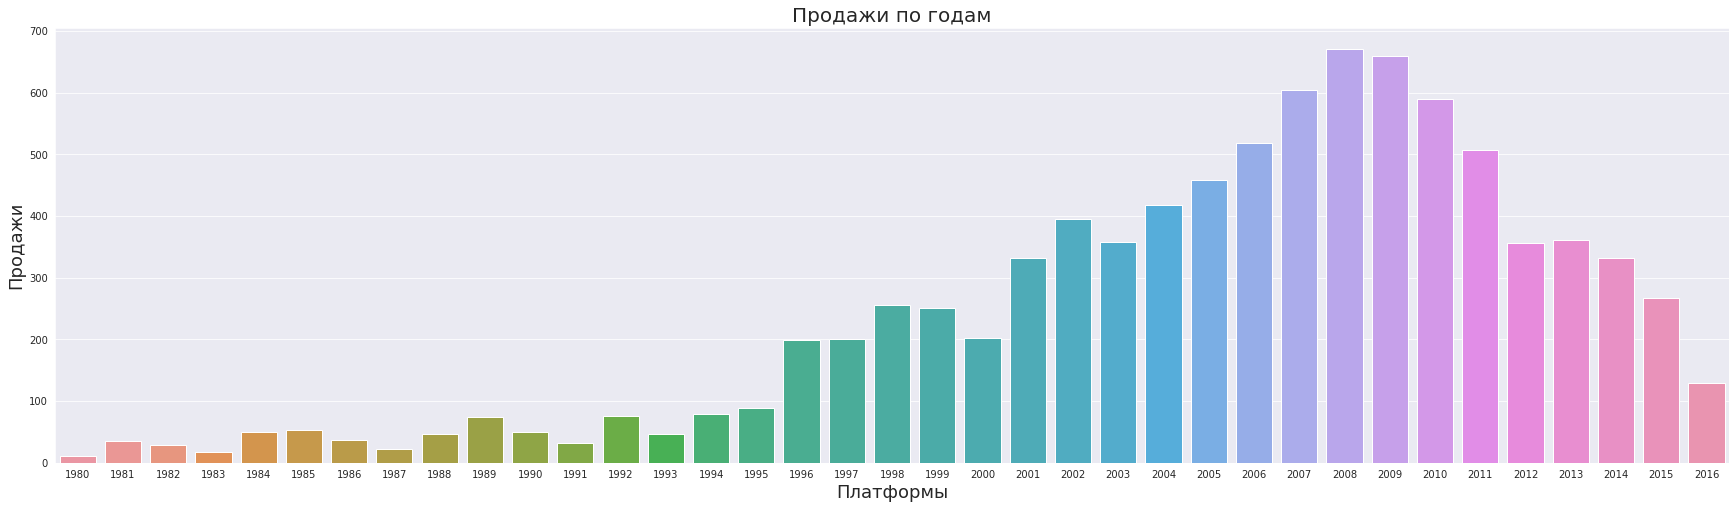

In [565]:
# построим столбчатую диаграмму

games_year = games.pivot_table(index='year', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(30,8))
sns.barplot(x=games_year.index,y=games_year['total_sales'])
plt.title("Продажи по годам", fontsize=20)
plt.xlabel("Платформы", fontsize=18)
plt.ylabel("Продажи", fontsize=18)

In [566]:
games['year'].describe()

count    16444.000000
mean      2006.486256
std          5.875525
min       1980.000000
25%       2003.000000
50%       2007.000000
75%       2010.000000
max       2016.000000
Name: year, dtype: float64

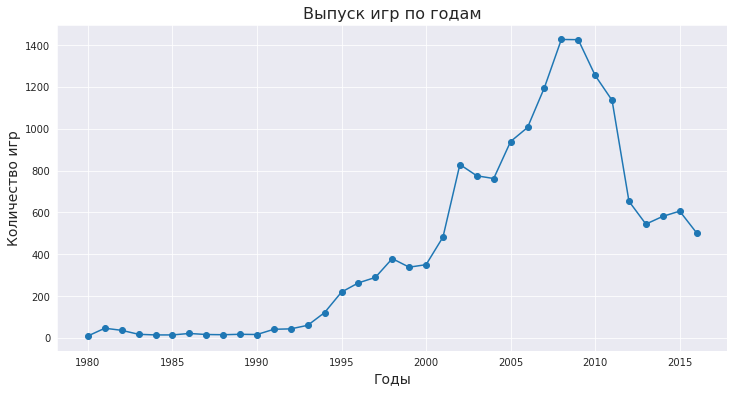

In [567]:
# построим график с линейной визуализацией тоже

games_year = games.groupby('year')['name'].count()

games_year.plot(style='o-', figsize=(12, 6), grid=True)
plt.title('Выпуск игр по годам', fontsize=16)
plt.xlabel('Годы', fontsize=14)
plt.ylabel('Количество игр', fontsize=14)
plt.show()


<AxesSubplot:>

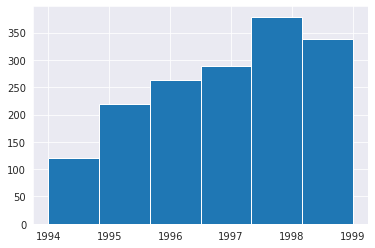

In [568]:
games['year'].hist(bins = 6, range=(1994, 1999))

Разобьем весь временной путь на более короткие отрезки и рассмотрим их внимательнее. Предлагаем не рассматривать период до 1994 года, когда производство игр было на начальном этапе и количество выпускаемых игр тогда было незначительным по сравнению с будущими периодами. 

<AxesSubplot:>

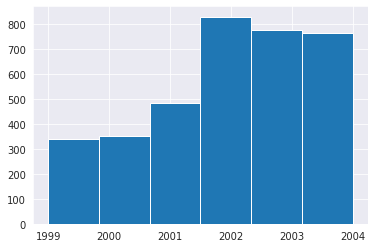

In [569]:
games['year'].hist(bins = 6, range=(1999, 2004))

<AxesSubplot:>

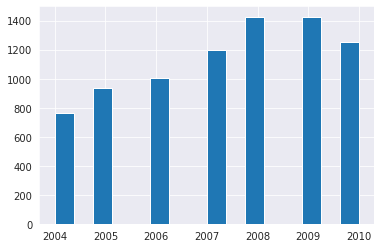

In [570]:
games['year'].hist(bins = 16, range=(2004, 2010))

<AxesSubplot:>

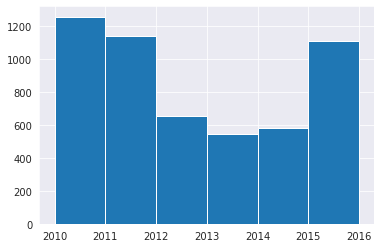

In [571]:
games['year'].hist(bins = 6, range=(2010, 2016))

Как видно из рассматриваемых отрезков, популряность игр имеет цикличный характер жизни - за каждый всплеском идёт спад и так далее. Поэтому можно утверждать, что периоды неодинаковы, важны в разной степени и самый интересный отрезок, с наибольшим количеством продаж приходится ориентировочно на 2005-2010 годы. В нём мы видим резкий скачок и затем почти такой же резкий спад. 

**Посмотрим как менялись продажи по платформам**

Text(0, 0.5, 'Продажи')

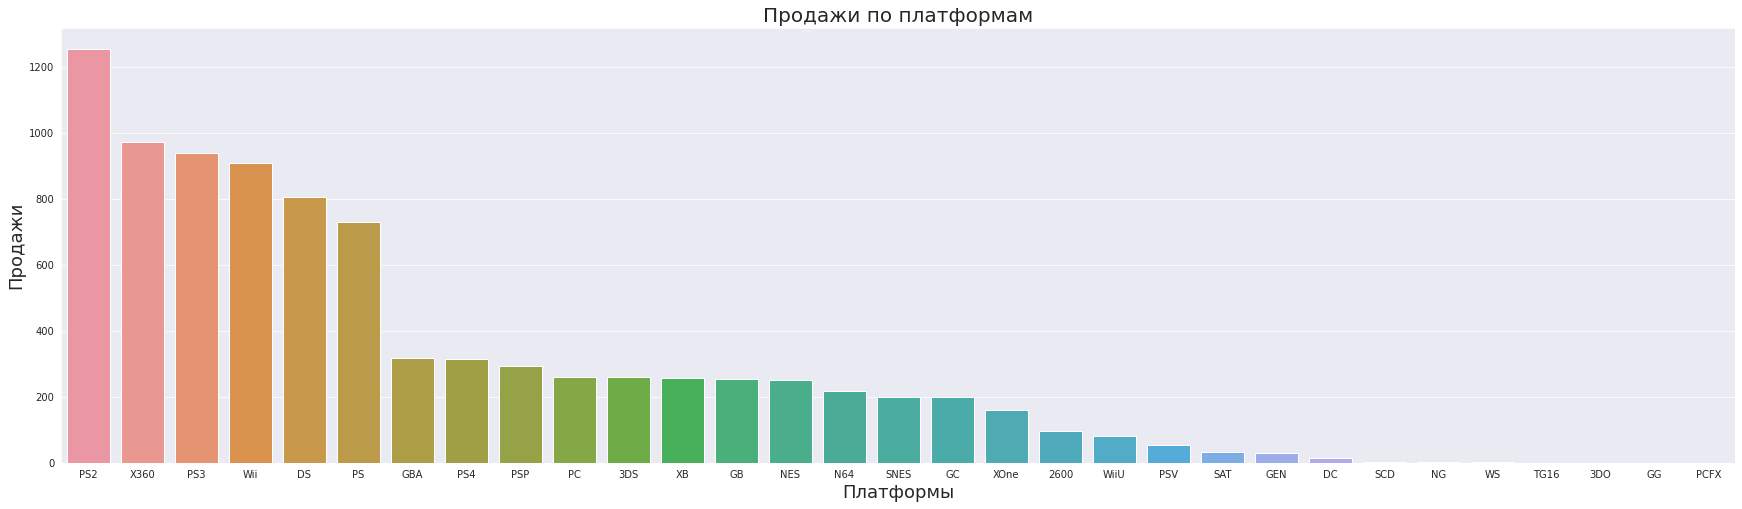

In [572]:
games_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum').sort_values(
    by='total_sales', ascending=False)

plt.figure(figsize=(30,8))
sns.barplot(x=games_platform.index,y=games_platform['total_sales'])
plt.title("Продажи по платформам", fontsize=20)
plt.xlabel("Платформы", fontsize=18)
plt.ylabel("Продажи", fontsize=18)


Самые популярные игровые приставки: PS2, X360, PS3, Wii, DS, PS. По остальным консолям данные резко падают. Давайте посмотрим повнимательнее на эти 6 лидеров.

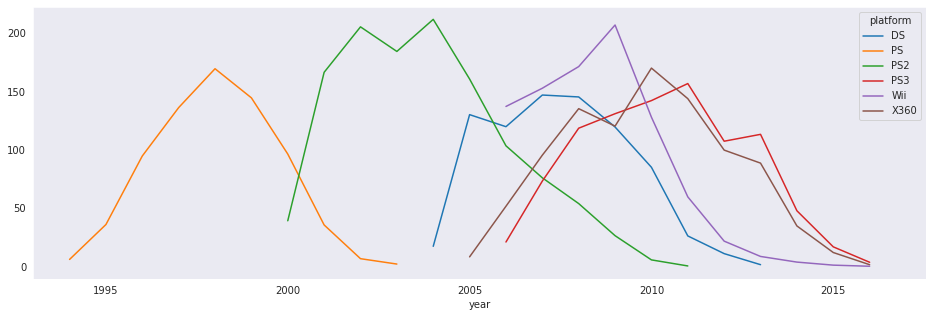

In [573]:
total_sales_platform = games.pivot_table(index='platform', values='total_sales', aggfunc='sum'
                                        ).nlargest(6,'total_sales').index
ax = games.query('platform in @total_sales_platform').pivot_table(
    index = 'year', columns = 'platform', values= 'total_sales', aggfunc = 'sum').plot(figsize = (16,5))
ax.set_xlim(left = 1993)
plt.grid()
plt.show()


Общий портрет игровой консоли выглядит так: продолжительность жизни около 10 лет, есть пик роста (редко два пика) и равномерное снижение после.
Топ-6 уверенных игровых приставок-лидеров на рынке:
- PlayStation 2;
- Xbox360; 
- PlayStation 3; 
- Wii Nintendo; 
- Nintendo DS; 
- PlayStation.

**Потенциально прибыльные платформы за актуальный период**

Примем за актуальный период годы с 2014 по 2016 – это будет оптимальный выбор с учётом динамичности и обновляемости игровой индустрии.

In [574]:
actual_period = games.query('2014 <= year <= 2016') 
actual_period


,name,platform,year,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,no_rating,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
47,Pokemon Omega Ruby/Pokemon Alpha Sapphire,3DS,2014,Role-Playing,4.35,3.49,3.10,0.74,NaN,NaN,no_rating,11.68
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,no_rating,7.98
...,...,...,...,...,...,...,...,...,...,...,...,...
16703,Strawberry Nauts,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16707,Aiyoku no Eustia,PSV,2014,Misc,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01
16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,no_rating,0.01


Построим тепловую карту с лидирующими платформами за актуальный период:

<AxesSubplot:xlabel='year', ylabel='platform'>

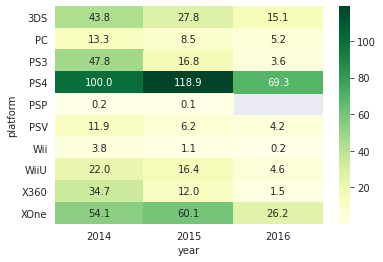

In [575]:
actual_platform_pivot = actual_period.pivot_table(
    index='platform', columns='year', values = 'total_sales', aggfunc = 'sum')
sns.heatmap(actual_platform_pivot, annot=True, cmap="YlGn", fmt='.1f')

По данным карты можем сделать вывод, что в рассматриваемый актуальный период в продажах уверенно лидирует PS4. Далее следует XOne. 
Потенциально прибыльными можно назвать как раз их и теоретически 3DS – пик её популярности прошёл недавно и остаточный темп может быть актуальным какое-то время.

Text(0, 0.5, 'Глобальные продажи')

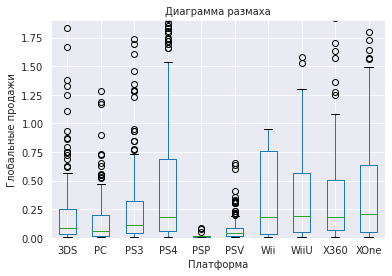

In [576]:
# посмотрим диаграмму размаха по платформам за актуальный период

actual_period.pivot_table(index = 'name', columns = 'platform', values = 'total_sales', aggfunc = 'sum'
                       ).plot(kind='box', ylim=(0,1.9))

plt.title('Диаграмма размаха', fontsize=10)
plt.xlabel('Платформа', fontsize=10)
plt.ylabel('Глобальные продажи',fontsize=10)

Исходя из диаграммы размаха, в список потенциально прибыльных платформ можем добавить: WiiU, Wii, X360.

Text(0, 0.5, 'Глобальные продажи потенциальных платформ')

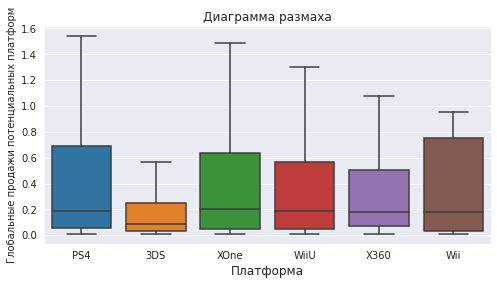

In [605]:
# посмотрим диаграмму размаха по глобальным продажам потенциально прибыльных платформ

potentional_platforms = ['PS4', 'XOne', '3DS','WiiU', 'Wii', 'X360']
actual_games = actual_period.query('platform == @potentional_platforms')

plt.figure(figsize=(8,4))
sns.boxplot(data=actual_games, x='platform', y='total_sales', sym='')
plt.title('Диаграмма размаха', fontsize=12)
plt.xlabel('Платформа', fontsize=12)
plt.ylabel('Глобальные продажи потенциальных платформ',fontsize=10)

In [606]:
games_top6_platforms = games[games['platform'].isin(['PS4', 'XOne', '3DS','WiiU', 'Wii', 'X360'])]
games_top6_platforms.groupby('platform')['total_sales'].describe()

,count,mean,std,min,25%,50%,75%,max
platform,,,,,,,,
3DS,520.0,0.498077,1.430876,0.01,0.05,0.12,0.3300,14.60
PS4,392.0,0.801378,1.609456,0.01,0.06,0.20,0.7300,14.63
Wii,1320.0,0.687508,3.126609,0.01,0.08,0.19,0.4825,82.54
WiiU,147.0,0.559116,1.058836,0.01,0.08,0.22,0.5250,7.09
X360,1262.0,0.769746,1.615674,0.01,0.11,0.28,0.7575,21.82
XOne,247.0,0.645020,1.036139,0.01,0.06,0.22,0.6850,7.39


Лидирующие медианные продажи у платформы PS4, X360, Wii, XOne.

Почти у всех платформ есть выбросы. 

 **Влияние отзывов пользователей и критиков на продажи внутри одной платформы**

Построим диаграмму рассеяния приставки PS4, у которой медиана продаж самая высокая.

Диаграмма рассеяния PS4


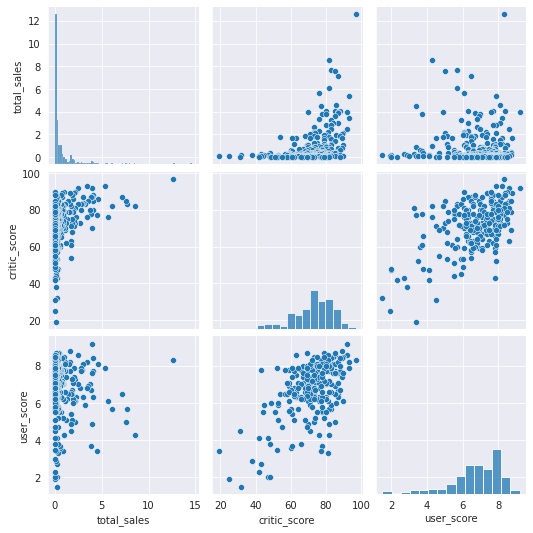

In [579]:
# диаграмма рассеяния

print("Диаграмма рассеяния PS4")
sns.pairplot(games[games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']])
plt.show()

По диаграмме рассеяния видим что, рейтинг положительно сказался на продажах, хотя есть и исключения в столбце user_score, когда с высоким рейтингом пользователей продаж получилось немного.

**Корреляция между отзывами и продажами**

In [607]:
# считаем корреляцию
display('Коэффициент корреляции между продажами и отзывами пользователей:', games['total_sales'].corr(games['user_score']))
display('Коэффициент корреляции между продажами и отзывами критиков:', games['total_sales'].corr(games['critic_score']))

'Коэффициент корреляции между продажами и отзывами пользователей:'

0.08817911987579136

'Коэффициент корреляции между продажами и отзывами критиков:'

0.24550668717736357

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

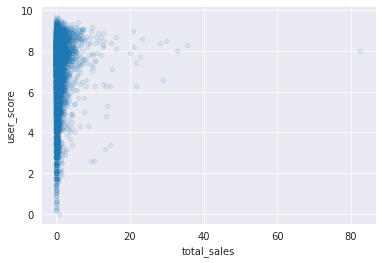

In [581]:
# график зависимости продаж и отзывов пользователей
games.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.1)

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

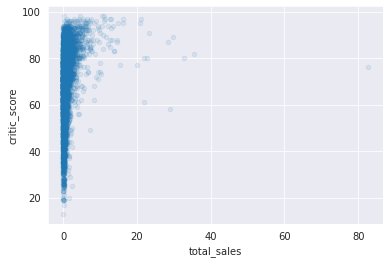

In [582]:
# график зависимости продаж и отзывов критиков
games.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.1)

Коэффициент корреляции между продажами и отзывами пользователей равен 0.088, что говорит о слабой положительной корреляции между этими переменными. Продажи не сильно зависят от отзывов пользователей.

Коэффициент корреляции между продажами и отзывами критиков равен 0.246, что также говорит о слабой положительной корреляции между этими переменными. Чуть больше, чем у пользователей, но также довольно слабая связь.

**Посмотрим на корреляцию продаж самой успешной PS4 и отзывами**

In [583]:
# считаем корреляцию продаж PS4 и отзывов пользователей
display('Коэффициент корреляции между продажами и отзывами пользователей на PS4:', 
        games[games['platform']=='PS4']['total_sales'].corr(games[games['platform']=='PS4']['user_score']))

'Коэффициент корреляции между продажами и отзывами пользователей на PS4:'

-0.031957110204556376

<AxesSubplot:xlabel='total_sales', ylabel='user_score'>

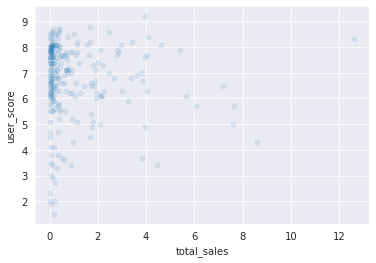

In [584]:
# график зависимости продаж PS4 и отзывов пользователей
games_ps4 = games[games['platform'] == 'PS4']

games_ps4.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.1)


In [585]:
# считаем корреляцию продаж PS4 и отзывов критиков
display('Коэффициент корреляции между продажами и отзывами критиков на PS4:', 
        games[games['platform']=='PS4']['total_sales'].corr(games[games['platform']=='PS4']['critic_score']))

'Коэффициент корреляции между продажами и отзывами критиков на PS4:'

0.406567902061781

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

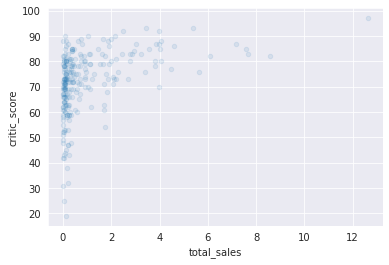

In [586]:
# график зависимости продаж PS4 и отзывов критиков
games_ps4 = games[games['platform'] == 'PS4']

games_ps4.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.1)


In [587]:
# сделаем матрицу корреляции
games[games.platform == "PS4"][['total_sales', 'critic_score', 'user_score']].corr()

,total_sales,critic_score,user_score
total_sales,1.000000,0.406568,-0.031957
critic_score,0.406568,1.000000,0.557654
user_score,-0.031957,0.557654,1.000000


Коэффициент корреляции между продажами PS4 и отзывами пользователей равен -0.0319, что говорит о слабой отрицательной корреляции между этими переменными. Отзывы пользователей на продажу приставки не повлияли.

Коэффициент корреляции между продажами PS4 и отзывами критиков равен 0.4065, что показывает среднюю корреляцию между продажами консоли и отзывами критиков. Отзывы критиков на продажу повлияли, но не сильно.

**Проверим корреляцию ещё у двух платформ: X360 и Wii**


'Коэффициент корреляции между продажами и отзывами пользователей на X360:'

0.11445882978454186

'Коэффициент корреляции между продажами и отзывами критиков на X360:'

0.3937358653072584

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

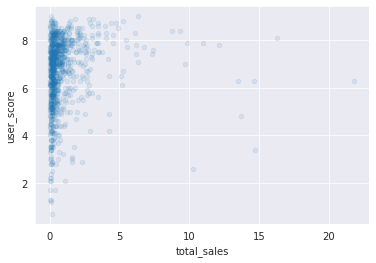

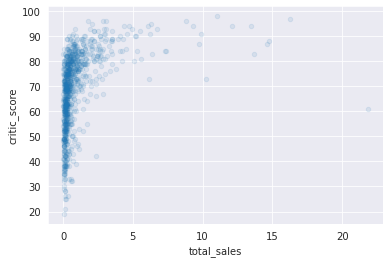

In [588]:
# считаем корреляцию продаж X360 и отзывов пользователей
display('Коэффициент корреляции между продажами и отзывами пользователей на X360:', 
        games[games['platform']=='X360']['total_sales'].corr(games[games['platform']=='X360']['user_score']))

# график зависимости продаж X360 и отзывов пользователей
games_x360 = games[games['platform'] == 'X360']

games_x360.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.1)

# считаем корреляцию продаж X360 и отзывов критиков
display('Коэффициент корреляции между продажами и отзывами критиков на X360:', 
        games[games['platform']=='X360']['total_sales'].corr(games[games['platform']=='X360']['critic_score']))

# график зависимости продаж X360 и отзывов пользователей
games_x360 = games[games['platform'] == 'X360']

games_x360.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.1)

'Коэффициент корреляции между продажами и отзывами пользователей на Wii:'

0.11241436067003162

'Коэффициент корреляции между продажами и отзывами критиков на Wii:'

0.17755988806089956

<AxesSubplot:xlabel='total_sales', ylabel='critic_score'>

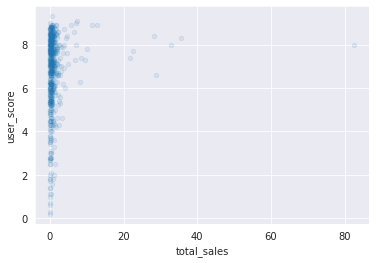

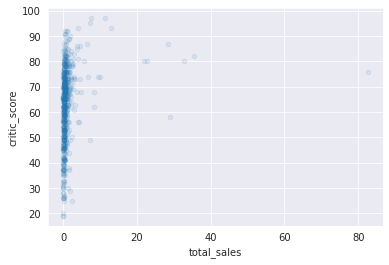

In [608]:
# считаем корреляцию продаж Wii и отзывов пользователей
display('Коэффициент корреляции между продажами и отзывами пользователей на Wii:', 
        games[games['platform']=='Wii']['total_sales'].corr(games[games['platform']=='Wii']['user_score']))

# график зависимости продаж Wii и отзывов пользователей
games_wii = games[games['platform'] == 'Wii']

games_wii.plot(x='total_sales', y='user_score', kind='scatter', alpha=0.1)

# считаем корреляцию продаж Wii и отзывов критиков
display('Коэффициент корреляции между продажами и отзывами критиков на Wii:', 
        games[games['platform']=='Wii']['total_sales'].corr(games[games['platform']=='Wii']['critic_score']))

# график зависимости продаж Wii и отзывов пользователей
games_wii = games[games['platform'] == 'Wii']

games_wii.plot(x='total_sales', y='critic_score', kind='scatter', alpha=0.1)

Тенденция распределения корреляции у X360 и PS3 оказалась очень схожей с ситуацией по PS4:
0.3937358653072584
- коэффициент корреляции между продажами и отзывами пользователей на X360 равен 0.1144, слабоположительная связь, значит отзывы пользователей не продажи не влияли;
- коэффициент корреляции между продажами и отзывами критиков на X360 равен 0.3937, связь положительная, но влияние не сильное;
- коэффициент корреляции между продажами и отзывами пользователей на Wii равен 0.1124, слабоположительный, значит отзывы пользователей не продажи не влияли;
- коэффициент корреляции между продажами и отзывами критиков на Wii равен 0.1775, что является также слабоположительным показателем зависимости.

 **Общее распределение игр по жанрам**

In [609]:
# посмотрим как распределяются игры по жанрам по средним значениям в выбранный актуальный период 
# (с 2014 по 2016 годы) относительно общих продаж

actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values(
    ascending=False, by = 'total_sales')


,total_sales
genre,
Shooter,1.335469
Sports,0.680000
Platform,0.476053
Fighting,0.470333
Role-Playing,0.459005
Racing,0.398841
Misc,0.332301
Action,0.322068
Simulation,0.298409


<AxesSubplot:ylabel='total_sales'>

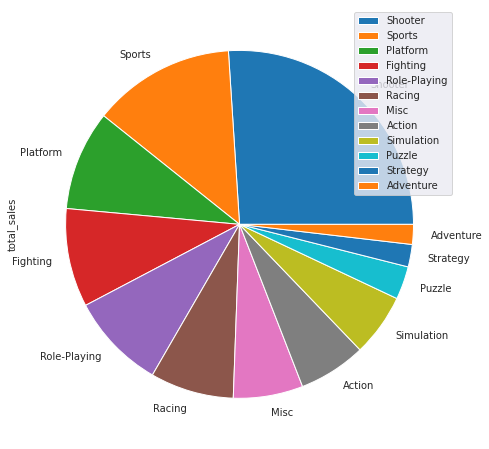

In [591]:
# для наглядности выведем круговую диаграмму для средних значений продаж по жанрам
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'mean').sort_values(
    ascending=False, by = 'total_sales').plot(kind='pie', figsize=(8,8), y= 'total_sales')


In [592]:
# посмотрим как распределяются игры по жанрам по медианным значениям в выбранный актуальный период 
# (с 2014 по 2016 годы) относительно общих продаж

actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(
    ascending=False, by = 'total_sales')

,total_sales
genre,
Shooter,0.515
Sports,0.180
Platform,0.140
Fighting,0.125
Role-Playing,0.110
Simulation,0.100
Action,0.090
Misc,0.090
Racing,0.090


<AxesSubplot:ylabel='total_sales'>

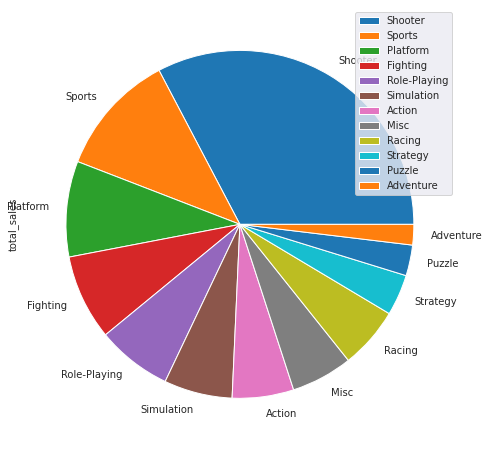

In [593]:
# для наглядности выведем круговую диаграмму для медианных значений продаж по жанрам
actual_period.pivot_table(index = 'genre', values = 'total_sales', aggfunc = 'median').sort_values(
    ascending=False, by = 'total_sales').plot(kind='pie', figsize=(8,8), y= 'total_sales')

Вывод: с очень приличным отрывом побеждает жанр Shooter. На втором уверенном месте Sports. Дальше почти одинаковые доли забрали Platform, Fighting, Role-Playing, Racing, Misc, Action, Simulation. И совсем мало пользователей вдохновляют Strategy, Puzzle, Adventure.

**Вывод по этапу №4**
<br>
<br>

Ощутимый рост количества игр для игровых конслей и комьютеров началось во второй половине 90-х годов: благодаря развитию технологий и доступности игровых приставок и компьютеров для каждого. 

С 2008 года популярность видео-игр начала снижаться, связать это можно с развитием мобильных телефонов, смартфоны, игры на них, соц.сети и так далее - начали завоёвывать внимание пользователей.

Самые популярные игровые платформы за всё время : PlayStation 2, Xbox360, PlayStation 3, Wii Nintendo, Nintendo DS, PlayStation.

Потенциально перспективные платформы PS4, XOne, 3DS,PS3, Wii, X360.

Средний цикл жизнь игровой платформы составляет  около 10 лет. Пик продаж ориентировочно происходит в середине этого цикла.

Взаимосвязь между продажами и оценками: пользовательские отзывы почти не играют роли. Зависимость от мнение критиков хоть и слабая, но прослеживается. Пользователям при покупке важнее мнение критиков, а не других игроков. 

Самые популярные жанры за рассматриваемый период с 2014 по 2016 годы: Action, Shooter и Sports. А вот совсем не заходят стратегии и пазлы. 


## Составление портрета пользователя каждого региона

Определим для пользователя каждого региона (NA, EU, JP):
- самые популярные платформы (топ-5);
- самые популярные жанры (топ-5);
- влияние рейтинга ESRB на продажи в отдельном регионе.

**Топ-5 популярных платформ (по регионам)**

**Северная Америка**

<AxesSubplot:xlabel='platform'>

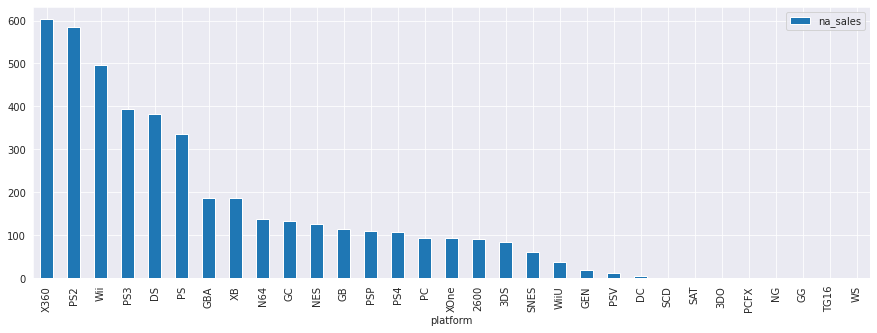

In [594]:
games.pivot_table(index = 'platform', values = 'na_sales', aggfunc = 'sum'
                 ).sort_values(ascending=False, by = 'na_sales').plot(kind = 'bar', figsize=(15,5))

В Северной Америке самой популярной оказалась консоль местного производства – Xbox360. Но и совсем недалеко ушла японская PS2. С чуть меньшими показателями с 3 по 5 место также японские приставки.

**Европа**

<AxesSubplot:xlabel='platform'>

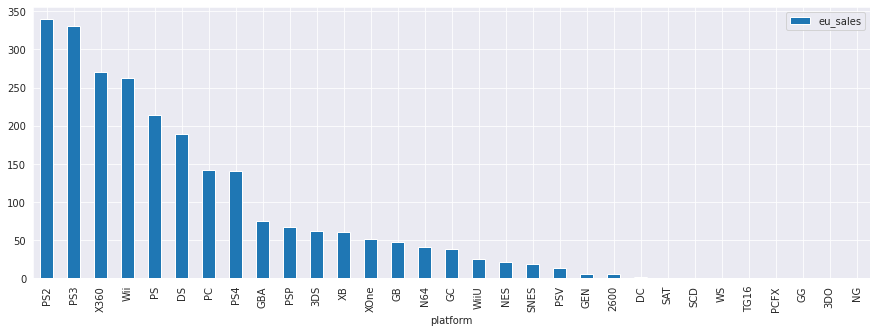

In [595]:
games.pivot_table(index = 'platform', values = 'eu_sales', aggfunc = 'sum'
                 ).sort_values(ascending=False, by = 'eu_sales').plot(kind = 'bar', figsize=(15,5))

В Европе самые популярные приставки японские: PS2 и PS3. Американская Xbox360 – на третьем месте. 4 и 5 место – японские приставки.

<AxesSubplot:xlabel='platform'>

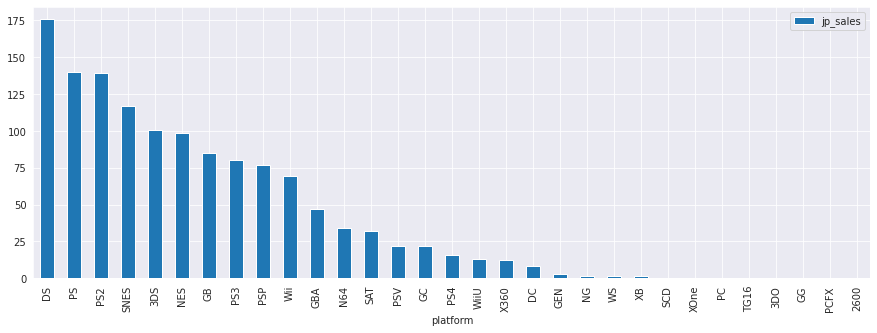

In [596]:
games.pivot_table(index = 'platform', values = 'jp_sales', aggfunc = 'sum'
                 ).sort_values(ascending=False, by = 'jp_sales').plot(kind = 'bar', figsize=(15,5))

В Японии весь топ-5 уверенно берут свои: DS, PS, PS2, SNES, 3DS. 

Топ-5 популярных платформ


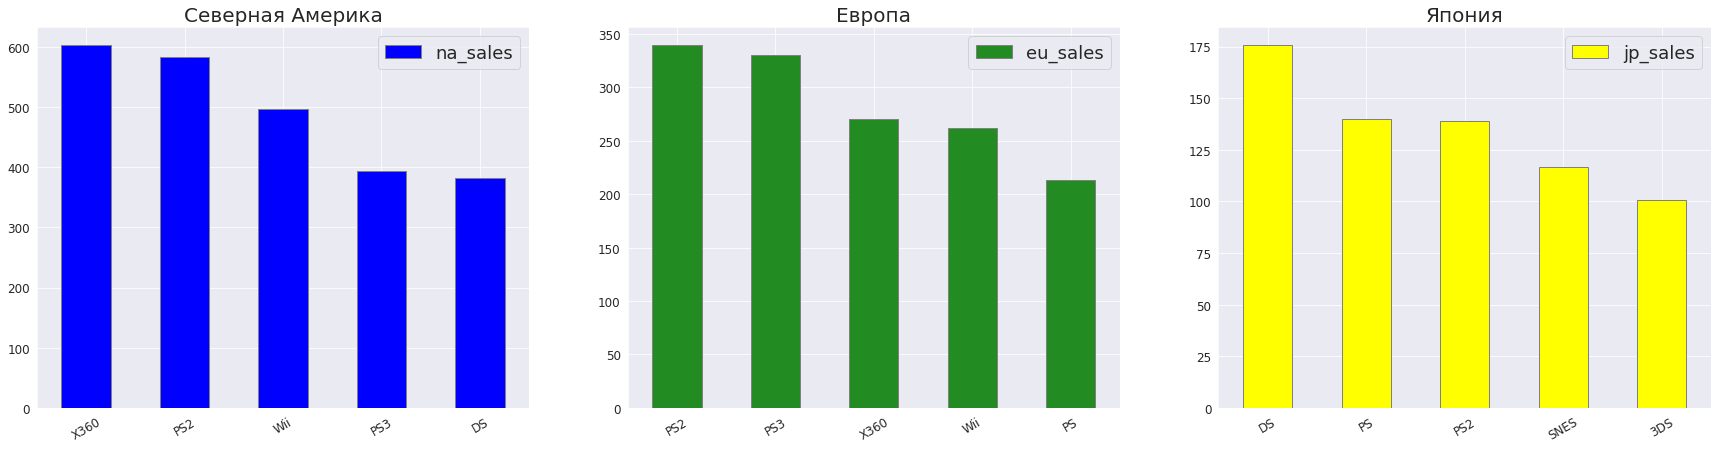

In [597]:
def top_regions(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'forestgreen', 'jp_sales': 'yellow'}
    plot = pivot.plot(kind='bar', ec='gray', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=12, color=color_dict[region_sales], rot=30)
    plot.legend(prop={'size':18})
    plot.set_xlabel('')
    plot.title.set_size(20)
    
print ('Топ-5 популярных платформ')
fig, axes = plt.subplots(1, 3, figsize=(30,7))

top_regions('platform', 'na_sales', 0)
top_regions('platform', 'eu_sales', 1)
top_regions('platform', 'jp_sales', 2)  

Вывод: в каждом регионе есть специфика выбора приставок своего производства.

**Топ-5 популярных жанров (по регионам)**

Топ-5 популярных жанров


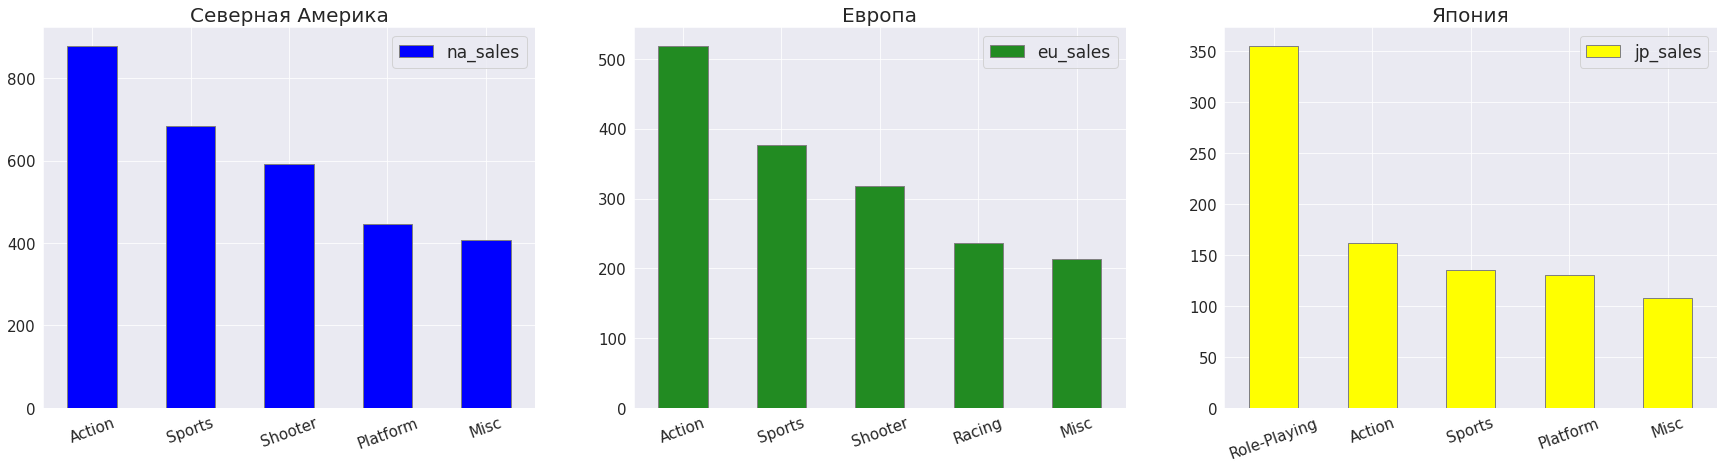

In [598]:
def top_regions(groupby, region_sales, ax):
    pivot = games.groupby(groupby).agg({region_sales: 'sum'}).sort_values(by=region_sales, ascending=False)[:5]
    title_dict = {'na_sales': 'Северная Америка', 'eu_sales': 'Европа', 'jp_sales': 'Япония'}
    color_dict = {'na_sales': 'blue', 'eu_sales': 'forestgreen', 'jp_sales': 'yellow'}
    plot = pivot.plot(kind='bar', ec='gray', title=title_dict[region_sales], ax=axes[ax], 
                   fontsize=15, color=color_dict[region_sales], rot=20)
    plot.legend(prop={'size':17})
    plot.set_xlabel('')
    plot.title.set_size(20)
    
print ('Топ-5 популярных жанров')
fig, axes = plt.subplots(1, 3, figsize=(30,7))

top_regions('genre', 'na_sales', 0)
top_regions('genre', 'eu_sales', 1)
top_regions('genre', 'jp_sales', 2)  

Вывод: выбор жанров в Северной Америке и Европе почти совпал, а в Японии уверенно лидирует Role-Playing.

**Влияние рейтинга ESRB на продажи в отдельном регионе**

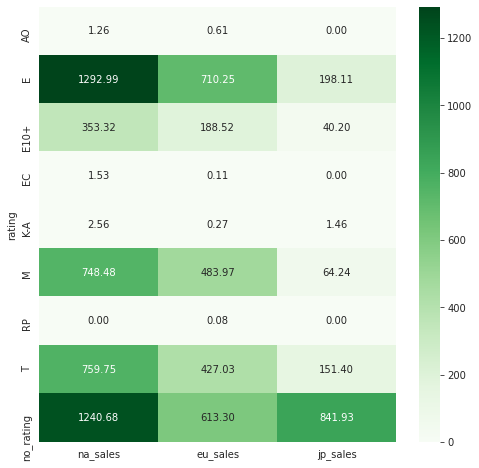

In [599]:
games_esrb = games.groupby('rating')[['na_sales', 'eu_sales', 'jp_sales']].sum()
plt.figure(figsize=(8,8))
sns.heatmap(games_esrb, annot=True, cmap='Greens', fmt='.2f')
plt.show()

Rating — отображает рейтинг от организации ESRB (англ. Entertainment Software Rating Board), определяющей рейтинг компьютерных игр. Ассоциация присваивает подходящую возрастную категорию.
<br>
<br>
Расшифровка категорий:
- «EC» («Early childhood») — «Для детей младшего возраста»
- «E» («Everyone») — «Для всех»
- «K-A» («Kids to Adults»)— «Для детей и взрослых»
- «E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»
- «T» («Teen») — «Подросткам»
- «M» («Mature») — «Для взрослых»
- «AO» («Adults Only 18+») — «Только для взрослых»
- «RP» («Rating Pending») — «Рейтинг ожидается»
<br>
<br>
В Северной Америке самой восстребованной категорией стала «Для всех», а также большую долю забрали игры, которые остались без простравленного рейтинга. Далее идут категории «Подросткам» и «Для взрослых».
<br>
<br>
В Европе похожа картина сложилась похожим образом, практически идентичным – «Для всех», «Для взрослых», «Подросткам».
<br>
<br>
А в Японии и подавно, категория-"без категории" с большим отрывом победила всех и дальше во много раз меньше отметились категории «Для всех» и «Подросткам».

In [600]:
# сделаем матрицу
rating = games.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales','total_sales'], aggfunc='sum').sort_values(by='na_sales', ascending=False)
rating


,eu_sales,jp_sales,na_sales,total_sales
rating,,,,
E,710.25,198.11,1292.99,2435.52
no_rating,613.30,841.93,1240.68,2846.91
T,427.03,151.40,759.75,1493.35
M,483.97,64.24,748.48,1473.79
E10+,188.52,40.20,353.32,655.60
K-A,0.27,1.46,2.56,4.32
EC,0.11,0.00,1.53,1.75
AO,0.61,0.00,1.26,1.96
RP,0.08,0.00,0.00,0.09


Вывод: категория рейтинга ESRB влияет на продажи в отдельных регионах. Есть категории которые востребованы в Европе и Америке, а в Японии совсем нет. Например, «Для детей младшего возраста», «Только для взрослых». 

**Вывод по этапу №5**
На продажи игровых приставок влияет регион продаж и рейтинг ESRB. Так, в Северной Америке и Европе предпочитают американские консоли и жанры Action, Sports и Shooter, а в Японии выбирают приставки своего производства и жанр Role-Playing (с большим отрывом по сравнению с последущими Action и Sports).

## Проверка гипотезы

В этом разделе нам необходимо проверить гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [601]:
# работаем с гипотезой про рейтинги платформ, считаем средний пользовательский рейтинг двух платформ
XOne = games[(games['platform'] == 'XOne') &  (games['user_score'] > 0)]['user_score']#.mean().round()
PC = games[(games['platform'] == 'PC') &  (games['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг платформы Xbox One:', XOne.mean())
print('Средний пользовательский рейтинг платформы PC', PC.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.521428571428572
Средний пользовательский рейтинг платформы PC 7.062467532467533


In [602]:
# проверяем гипотезу с рейтингами платформ

alpha = .05 # определяем критический уровень статистической значимости таким значением, 
            # если p-value будет меньше - отвергнем гипотезу

results = st.ttest_ind(XOne, PC, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевую гипотезу отвергнуть не получилось")

p-значение: 4.935072360183574e-06
Отвергаем нулевую гипотезу


Вывод: первая гипотеза не подтвердилась, пользовательские рейтинги у Xbox One и PC оказались разными.

In [603]:
# работаем с гипотезой про рейтинги жанров, считаем средний пользовательский рейтинг двух жанров
action = games[(games['genre'] == 'Action') &  (games['user_score'] > 0)]['user_score']#.mean().round()
sports = games[(games['genre'] == 'Sports') &  (games['user_score'] > 0)]['user_score']#.mean().round()
print('Средний пользовательский рейтинг жанра Action:', action.mean())
print('Средний пользовательский рейтинг жанра Sports', sports.mean())

Средний пользовательский рейтинг жанра Action: 7.054043715846995
Средний пользовательский рейтинг жанра Sports 6.961196736174069


In [604]:
# проверяем гипотезу с рейтингами жанра

alpha = .05 # определяем критический уровень статистической значимости таким значением, 
           # если p-value будет меньше - отвергнем гипотезу

results = st.ttest_ind(action, sports, equal_var=False)

print('p-значение:', results.pvalue)

if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Нулевую гипотезу отвергнуть не получилось")

p-значение: 0.11483818791498286
Нулевую гипотезу отвергнуть не получилось


Вывод: вторая гипотеза подтвердилась, пользовательские рейтинги жанров Action и Sports – разные.

**Вывод по этапу №6**
<br>
<br>
В этом разделе получили результаты:
<br>
- гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" – не подтвердилась;
- гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" – подтвердилась.

## Общий вывод


1. В ходе исследования подробно была изучена информация о датафрейме и сделаны первые выводы: 
- данных для анализа окзалось достаточно;
- в данных были обнаружены пропуски;
- названия столбцов были не приведены к нижнему регистру и некоторые нуждались в переименовании (выполнили это преобразование сразу, на этом же этапе);
- типы данных столбцов не соответствовали их содержанию.

2. На этапе предобработки данных

- нашли пропуски данных (name, genre, year, critic_score, user_score, rating);
- обработали пропуски (удалили строки в name и genre так как их количество невелико и не повлияет на целостность данных; year, critic_score, user_score, rating оставили без изменений их количество больше и удаление может повлиять на качество анализа);
- проверили уникальные значения столбцов;
- обнаружили в user_score значение tbd, заменили его на nan;
- поменяли  типы данных в year, user_score.

3. Добавление данных в таблицу

Добавили отдельный столбец, в котором отображены суммарные продажи во всех регионах.

4. Исследовательский анализ данных

- выяснили, что не все этапы развития игровой индустрпии, одинаковы и важны для прогнозирования – так период до 1994 года можно отбросить;
- характерный срок, при котором появляются новые и исчезают старые платформы – 8-10 лет;
- для возможности прогнозирования на 2017 год, определили актуальный период с 2014 по 2016 годы, исследовали его;
- нашли, что корреляция между отзывами и продажами есть, но в случае пользовательских оценок очень слабая и практически отсутствует, в случае оценок критиков – связь слабая, но больше просматривается: пользователи больше ценят оценку критиков, чем других пользователей;
- выяснили, что самые популярные игровые платформы за всё время: PlayStation 2, Xbox360, PlayStation 3, Wii Nintendo, Nintendo DS, PlayStation, а потенциально перспективные PS4, X360, Wii, XOne.
- нашли, что самые популярные жанры Shooter, Sports. А совсем мало пользователей вдохновляют Strategy, Puzzle, Adventure.

5. Составление портрета пользователя каждого региона

Определили портрет пользователя для пользователя каждого региона (Северная Америка, Европа, Япония):
- самые популярные платформы: в Северной Америке - Xbox360, PS2, Wii, PS3, DS; в Европе - PS2, PS3, Xbox360, Wii, PS; в Японии - DS, PS, PS2, SNES, 3DS.
- самые популярные жанры:в Северной Америке - Action, Sports, Shooter; в Европе - Action, Sports, Shooter; в Японии - Role-Playing, Action, Sports.

На продажи игровых приставок влияет регион продаж и рейтинг ESRB. Так, в Северной Америке и Европе предпочитают американские консоли и жанры Action, Sports и Shooter, а в Японии выбирают приставки своего производства и жанр Role-Playing (с большим отрывом по сравнению с последущими Action и Sports).

6. Проверка гипотез

На этом этапе были протестированы гипотезы:
- средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Результат проверки:
- гипотеза "Средние пользовательские рейтинги платформ Xbox One и PC одинаковые" – не подтвердилась;
- гипотеза "Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные" – подтвердилась.

